# Data Analysis on the Life Cycle of Merchant Ships

## Background
* This project aims to investigate the life cycle of merchant ships using exploratory data analysis. As a former maritime professional, the life cycle of a merchant ship presents both positive issues, such as job creation, and negative issues, such as environmental and safety concerns. Identifying these trends in the life cycle of merchant ships will help us address these issues in a more efficient and responsible manner. 

## Objective
* To identify the trends in the life cycle of merchant ships.

## Data Source
* The archival data is collected from the UNCTAD Maritime Transport Statistics from 2014 to 2018, excluding the data for ship manning which only includes the 2015 statistics.

## Definitions
* Merchant Ship Life Cycle - refers to the processes involved in the lifetime of a merchant ship.
* Ship Building - refers to the construction of a merchant vessel from keel to superstructure.
* Ship Registration - refers to the legal and operational classification and abidance of a ship under a specific country with regards to safety , legal, and technical concerns.
* Ship Manning - refers to the employment of a seafarer onboard a ship.
* Ship Scrapping - refers to the demolition and material extraction of a ship.
* Gross Tonnage - refers to the overall internal volume of a ship.
* Deadweight Tonnage - refers to the volume that a ship can carry. 
* Flag States - refers to the legal jurisdiction under which a ship is registered.
* Flags of Convenience - refers to the legal jurisdiction of a ship wherein it is registered in a country other than that of the ship owners. 
* Container Ships - refers to a ship whose design and operation is only for containerized cargo.
* Bulk Carriers - refers to a ship whose design and operation is only for solid bulk cargo. 
* Tankers - refers to a ship whose design and operation is only for liquid bulk cargo.
* General Cargo - refers to a ship whose design and operation allows for general types of cargo.
* Officers - refers to management and operational level seafarers onboard ships.
* Ratings - refers to support level seafarers onboard ships.

## Environment Setup
* This notebook is written in Python on a Kaggle Kernel. 

## Packages Used
* Matplotlib 3.2.1
* Seaborn 0.10.0
* Pandas 1.1.1
* Numpy 1.18.5

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))   

/kaggle/input/ship-cycle-data/us_shipscrapping_49899044986574.xlsx
/kaggle/input/ship-cycle-data/us_merchantfleet_49899373973856.xlsx
/kaggle/input/ship-cycle-data/us_seafarers_49898732460687.xlsx
/kaggle/input/ship-cycle-data/us_shipbuilding_50634370025375.xlsx


### Loading the Datasets

In [2]:
shipbuilding_file = '../input/ship-cycle-data/us_shipbuilding_50634370025375.xlsx'
shipregistration_file = '../input/ship-cycle-data/us_merchantfleet_49899373973856.xlsx'
shipmanning_file = '../input/ship-cycle-data/us_seafarers_49898732460687.xlsx'
shipscrapping_file = '../input/ship-cycle-data/us_shipscrapping_49899044986574.xlsx'

build_data = pd.read_excel(shipbuilding_file)
reg_data = pd.read_excel(shipregistration_file)
man_data = pd.read_excel(shipmanning_file)
scrap_data = pd.read_excel(shipscrapping_file)

## Summary Statistics and Data Cleaning
* This section includes the presentation of the summary statistics, the removal of null values, and the feature engineering for each data set. 

### Summary Statistics: Ship Building

In [3]:
build_df = build_data.dropna().reset_index()
build_df.drop(columns=['index'], index=[0,60], inplace=True)
build_df.columns = ['Ships Built Annually by Country, GT', '2014', '2015', '2016', '2017', '2018']
build_df.replace(to_replace='..', value=0, inplace=True)
build_df[['2014','2015','2016','2017','2018']].astype('int64')
build_df.set_index('Ships Built Annually by Country, GT')

print('Summary Statistics: Ship Building Data')
print(build_df.describe())
print('DataFrame Dimensions')
print(build_df.shape)

Summary Statistics: Ship Building Data
               2014          2015          2016          2017          2018
count  6.000000e+01  6.000000e+01  6.000000e+01  6.000000e+01  6.000000e+01
mean   2.121932e+06  2.261282e+06  2.225753e+06  2.190362e+06  1.934512e+06
std    9.175546e+06  9.807333e+06  9.648687e+06  9.460046e+06  8.349845e+06
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.247500e+02  4.285000e+02  3.317500e+02  0.000000e+00  0.000000e+00
50%    4.901000e+03  5.936500e+03  3.744000e+03  8.515000e+03  3.449000e+03
75%    1.088480e+05  1.194295e+05  1.147542e+05  1.172738e+05  1.088985e+05
max    6.366224e+07  6.787690e+07  6.678274e+07  6.571244e+07  5.804513e+07
DataFrame Dimensions
(60, 6)


### Summary Statistics: Ship Registration

In [4]:
years = reg_data.loc[:,'Unnamed: 2':'Unnamed: 35']
reg_df = reg_data.drop(index=[0,1,2,4,5,6,7,8,9,10], columns=years).reset_index()
reg_df.drop(columns=['index','Unnamed: 41'], index=[0], inplace=True)
reg_df.columns =['Region','Vessel Type','2014','2015','2016','2017','2018']
reg_df.replace(to_replace='..', value=0, inplace=True)
reg_df[['2014','2015','2016','2017','2018']].astype('int64')
reg_df.set_index('Region')

print('Summary Statistics: Ship Registration Data')
print(reg_df.describe())
print('DataFrame Dimensions')
print(reg_df.shape)

Summary Statistics: Ship Registration Data
               2014          2015          2016          2017          2018
count  9.240000e+02  9.240000e+02  9.240000e+02  9.240000e+02  9.240000e+02
mean   7.827806e+04  8.080050e+04  8.331370e+04  8.572537e+04  8.862345e+04
std    1.607787e+05  1.666511e+05  1.720419e+05  1.773282e+05  1.829079e+05
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.248987e+03  2.330092e+03  2.466641e+03  2.132167e+03  2.135700e+03
50%    1.847272e+04  1.903251e+04  1.912793e+04  1.927912e+04  2.034077e+04
75%    7.706830e+04  8.058871e+04  8.335794e+04  8.230730e+04  9.055135e+04
max    1.688886e+06  1.747417e+06  1.805543e+06  1.862241e+06  1.924002e+06
DataFrame Dimensions
(924, 7)


### Summary Statistics: Ship Manning

In [5]:
man_df = man_data.drop(index=[0,1,2,4,5,6,7,8,9,10]).reset_index()
man_df.drop(columns=['index','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'], index=[0], inplace=True)
man_df.columns = ['2015 Seafarer Supply by Country','Officers','Ratings','Total']
man_df[['Officers','Ratings','Total']].astype('int64')
man_df.replace(to_replace='..', value=0, inplace=True)
man_df.set_index('2015 Seafarer Supply by Country')

print('Summary Statistics: Ship Manning Data')
print(man_df.describe())
print('DataFrame Dimensions')
print(man_df.shape)

Summary Statistics: Ship Manning Data
            Officers        Ratings          Total
count     170.000000     170.000000     170.000000
mean     4544.935294    5129.947059    9674.882353
std     12841.674376   17769.239092   29704.524906
min         0.000000       0.000000       0.000000
25%        42.500000      54.250000     104.000000
50%       289.500000     439.500000     774.500000
75%      2806.500000    2404.000000    5303.750000
max    101600.000000  143000.000000  243635.000000
DataFrame Dimensions
(170, 4)


### Summary Statistics: Ship Scrapping

In [6]:
scrap_df = scrap_data.dropna().reset_index()
scrap_df.drop(columns=['index'], index=[0], inplace=True)
scrap_df.columns = ['Ships Scrapped Annually by Country, GT', '2014', '2015', '2016', '2017', '2018']
scrap_df.replace(to_replace='..', value=0, inplace=True)
scrap_df[['2014','2015','2016','2017','2018']].astype('int64')
scrap_df.set_index('Ships Scrapped Annually by Country, GT')

print('Summary Statistics: Ship Scrapping Data')
print(scrap_df.describe())
print('DataFrame Dimensions')
print(scrap_df.shape)

Summary Statistics: Ship Scrapping Data
               2014          2015          2016          2017          2018
count  4.500000e+01  4.500000e+01  4.500000e+01  4.500000e+01  4.500000e+01
mean   9.969351e+05  1.037333e+06  1.294887e+06  1.018468e+06  8.413512e+05
std    3.600544e+06  3.779419e+06  4.758109e+06  3.698194e+06  3.165060e+06
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    2.356000e+03  1.421000e+03  3.589000e+03  8.820000e+02  1.575000e+03
75%    1.527900e+04  1.743900e+04  2.579600e+04  1.881200e+04  1.773500e+04
max    2.243104e+07  2.333999e+07  2.913495e+07  2.291552e+07  1.893040e+07
DataFrame Dimensions
(45, 6)


## Data Preparation
* The code below prepares and organizes the data for analysis. Each data set is sorted and several features were added. 

In [7]:
years = ['2014','2015','2016','2017','2018']

build_df['Total GT'] = build_df[years].sum(axis=1)
build_df.sort_values(by='Total GT', ascending=False, inplace=True, ignore_index=True)

vessel_reg_df = reg_df.loc[::,'Vessel Type':'2018']
vessel_reg_df['Total'] = reg_df[years].sum(axis=1)
vessel_reg_df.sort_values(by='Total', ascending=False, inplace=True, ignore_index=True)

regional_reg_df = pd.DataFrame(reg_df.groupby('Region', as_index=False)[years].sum())
regional_reg_df['Total'] = regional_reg_df[years].sum(axis=1)
regional_reg_df.sort_values(by='Total', ascending=False, inplace=True, ignore_index=True)

officer_man_df = pd.DataFrame(man_df.groupby('2015 Seafarer Supply by Country', as_index=False)['Officers'].sum())
officer_man_df.sort_values(by='Officers', ascending=False, inplace=True, ignore_index=True)

rating_man_df = pd.DataFrame(man_df.groupby('2015 Seafarer Supply by Country', as_index=False)['Ratings'].sum())
rating_man_df.sort_values(by='Ratings', ascending=False, inplace=True, ignore_index=True)

scrap_df['Total GT'] = scrap_df[years].sum(axis=1)
scrap_df.sort_values(by='Total GT', ascending=False, inplace=True, ignore_index=True)

## Data Distribution Overview
* This section gives us an overview of the distribution of the data involved in the life cycle phases of a merchant ship. The charts below indicate that for each phase and industry, there are only a few notable players. This concentration is due to the labor and capital intensive nature of the maritime and shipping industry. 

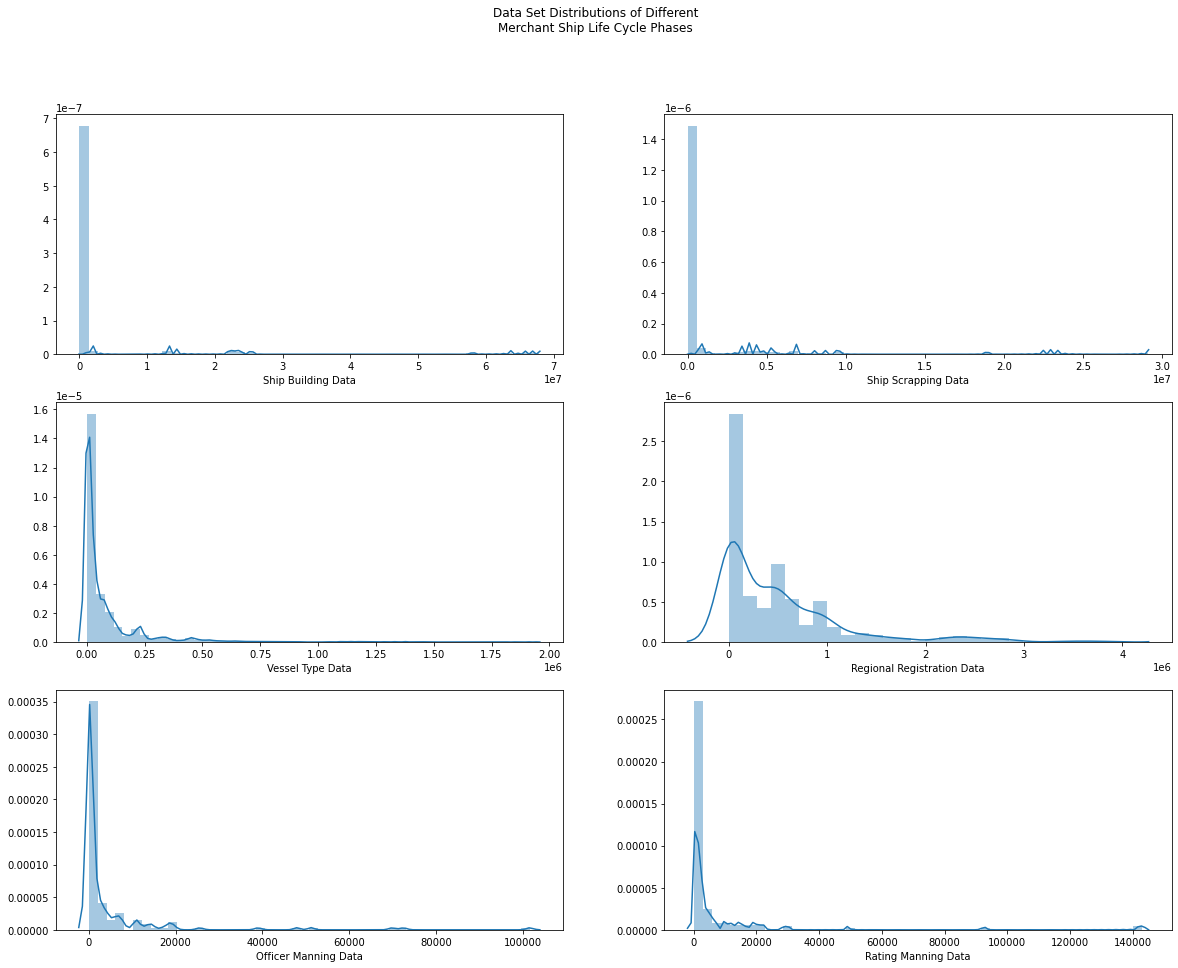

In [8]:
fig = plt.figure(figsize=(20,15))
axes = fig.subplots(3,2)

sns.distplot(build_df[['2014', '2015', '2016', '2017', '2018']], ax=axes[0,0], axlabel='Ship Building Data')
sns.distplot(scrap_df[['2014', '2015', '2016', '2017', '2018']], ax=axes[0,1], axlabel='Ship Scrapping Data')
sns.distplot(vessel_reg_df[['2014', '2015', '2016', '2017', '2018']], ax=axes[1,0], axlabel='Vessel Type Data')
sns.distplot(regional_reg_df[['2014', '2015', '2016', '2017', '2018']], ax=axes[1,1], axlabel='Regional Registration Data')
sns.distplot(officer_man_df[['Officers']], ax=axes[2,0], axlabel='Officer Manning Data')
sns.distplot(rating_man_df[['Ratings']], ax=axes[2,1], axlabel='Rating Manning Data')

plt.suptitle('Data Set Distributions of Different\nMerchant Ship Life Cycle Phases')
plt.savefig('Data Set Distribution Charts.png')

## Insights

### Ship Building
* From the 2014 to 2018 UNCTAD data, we can identify that the ship building industry was heavily concentrated in Asia, particularly in China, Korea, and Japan. Much of the gross tonnage production came from these three East Asian nations.

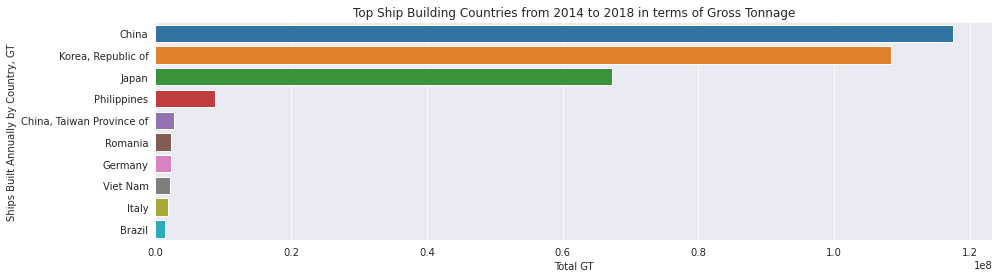

In [9]:
build_plot = build_df[['Ships Built Annually by Country, GT', 'Total GT']].iloc[1:11]

plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
sns.barplot(x=build_plot['Total GT'], y=build_plot['Ships Built Annually by Country, GT'], orient='h')
plt.title('Top Ship Building Countries from 2014 to 2018 in terms of Gross Tonnage')
plt.savefig('build_chart.png')

### Ship Registration
* Ship Registration pertains to the legal and technical classification of merchant ships. The section below focuses on the classification of merchant ships by technical design and operation, and the classification of merchant ships by regional registration. The latter is heavily embattled with legal issues in the maritime industry, such as the presence of Flags of Convenience registered vessels. 

### Ship Registration Overview
* The table below shows an overview of the ship registration industry throughout 2014 to 2018 in terms of deadweight tonnage. The table also indicates the vessel types registered and the regions where they were registered in. 

In [10]:
reg_table = pd.pivot_table(reg_df, values=['2014','2015','2016','2017','2018'], index='Region', columns='Vessel Type')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
reg_table

2014  \
Vessel Type                                        Bulk carriers   
Region                                                             
    ACP: Central Africa                                    0.000   
    ACP: Eastern Africa                                  366.495   
    ACP: Southern Africa                                   0.000   
    ACP: Western Africa                                70076.371   
    Caribbean                                          23179.291   
    Central America                                   206082.927   
    Developed economies: America                        3335.891   
    Developed economies: Asia                          15517.414   
    Developed economies: Europe                       121331.895   
    Developed economies: Oceania                         157.226   
    Developing economies: Africa                       71490.878   
    Developing economies: America                     230786.182   
    Developing economies: Asia                        216212.462   
    Developing economies: Oceania                      70367.333   
    Eastern Africa                                       366.495   
    LDCs: Africa and Haiti                             70302.590   
    LDCs: Asia                                          1909.951   
    LDCs: Islands                                       2390.877   
    Middle Africa                                          0.000   
    South America                                       1523.964   
    Southern Africa                                        0.000   
    Western Africa                                     70076.371   
  ACP: Africa                                          70442.866   
  ACP: Caribbean                                       23060.241   
  ACP: Pacific                                         70367.333   
  Central Asia                                             0.000   
  Developed economies                                 140342.426   
  Developing economies                                588856.855   
  Eastern Asia                                        167679.770   
  Eastern Europe                                         670.220   
  Emerging markets: Africa                               898.418   
  Emerging markets: America                             1784.701   
  Emerging markets: Asia                              209753.397   
  Emerging markets: Europe and Kazakhstan               1385.453   
  Latin America and the Caribbean                     230786.182   
  Net food-exporting developed economies               11802.848   
  Net food-exporting developing economies             289389.039   
  Net food-exporting transition economies                278.245   
  Net food-importing developed economies              128539.578   
  Net food-importing developing economies             299467.816   
  Net food-importing transition economies                453.202   
  Northern Africa                                       1048.012   
  Northern America                                      3335.891   
  Northern Europe                                      22153.148   
  South-eastern Asia                                   50132.648   
  Southern Asia                                         9161.071   
  Southern Europe                                      93276.865   
  Sub-Saharan Africa                                   70442.866   
  Transition economies                                   731.447   
  Western Asia                                          4773.140   
  Western Europe                                        5946.356   
ACP (African, Caribbean and Pacific Group of St...    163870.440   
ACP: LDCs                                              72693.467   
ACP: LLDCs                                                 0.000   
ACP: islands states                                    24287.801   
ACS (Association of Caribbean States)                 228300.160   
ALBA-TCP (Bolivarian Alliance for the Peoples o.

### Vessel Type Registration
* Merchant ships must be technically registered by operation. Tankers, Bulk Carriers, and Cargo Ships are just some of the famous types of merchant ships plying the world's oceans. The section below presents the technical designation of the world merchant fleet from 2014 to 2018, and shows that Bulk Carriers lead the global fleet in terms of combined deadweight tonnage, followed by Tankers, and Container Ships.
* 'Other types of ships' refer to the technical designation of offshore research vessels, cable/pipe laying vessels, dredgers, offshore supply vessels, and cruise ships, among many others. 'General Cargo' ships, on the other hand, refer to the specific designation of all-around cargo vessels, commonly found in coastal routes.

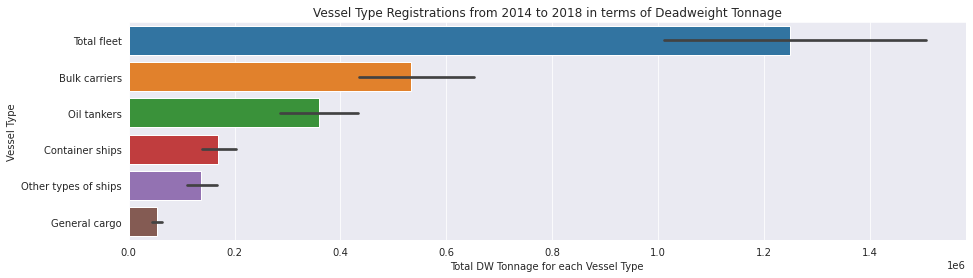

In [11]:
vessel_reg_plot = vessel_reg_df[['Vessel Type','Total']]

plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
sns.barplot(x=vessel_reg_plot['Total'], y=vessel_reg_plot['Vessel Type'], orient='h')
plt.xlabel('Total DW Tonnage for each Vessel Type')
plt.title('Vessel Type Registrations from 2014 to 2018 in terms of Deadweight Tonnage')
plt.savefig('vessel_type_chart.png')

### Regional Registration
* The regional registration of a merchant ship refers to the registration of a vessel under a certain flag state wherein the vessel abides by the standards, and regulations set forth by the aforementioned state. 
* For this section, the data is from 2014 to 2018  and indicates the flag state registration of merchant ships by region. The chart below indicates the top 20 regions for ship registration. On the top of the list are the M49 Developing Regions, and the Developing Economies region, as identified by the UNCTAD. 
* The M49 Developing Region refers to the United Nations registered countries which includes countries like Afghanistan, Djibouti, and the USA. The M49 nations encompassed all countries registered with the UN.
* The Developing Economies Region refers to the group of countries updated by the UNCTAD according to their global economic standing. Many countries from various continents are in this list, the notable exclusions are countries like USA, China, Japan, Germany, and other powerhouse nations. 

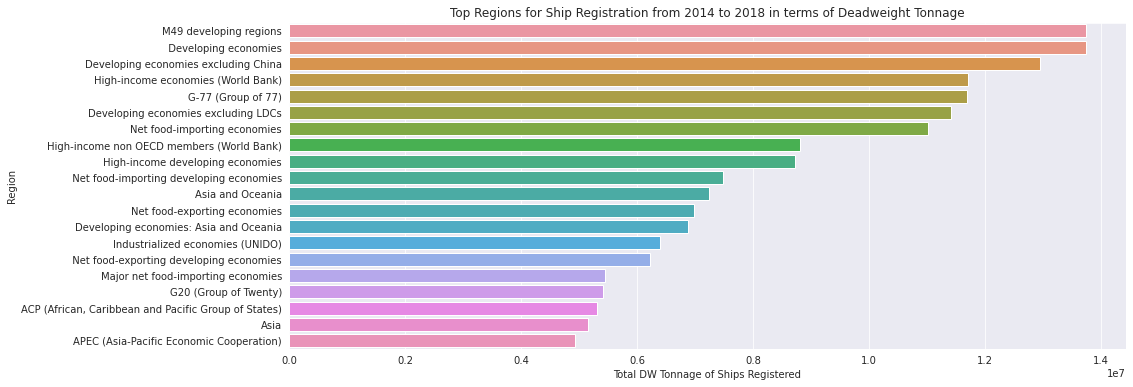

In [12]:
regional_reg_plot = regional_reg_df[['Region','Total']].iloc[1:21]

plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.barplot(x=regional_reg_plot['Total'], y=regional_reg_plot['Region'], orient='h')
plt.xlabel('Total DW Tonnage of Ships Registered')
plt.title('Top Regions for Ship Registration from 2014 to 2018 in terms of Deadweight Tonnage')
plt.savefig('vessel_region_chart.png')

### Ship Manning
* Ship manning refers to the employment of seafarers onboard merchant ships. This section will highlight the countries that deploys most of the seafarers of the global merchant fleet. 


### Officer Deployment by Country
* Merchant Ship Officers refer to the management and operational level seafarers onboard ships. From the 2015 UNCTAD statistics, China leads with the highest number of merchant ship officers, followed by the Philippines, India, Indonesia, and the Russian Federation.

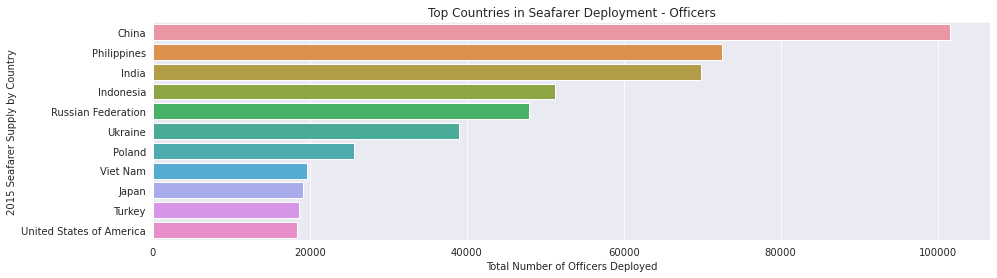

In [13]:
officer_man_plot = officer_man_df.iloc[0:11]

plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
sns.barplot(x=officer_man_plot['Officers'], y=officer_man_plot['2015 Seafarer Supply by Country'], orient='h')
plt.xlabel('Total Number of Officers Deployed')
plt.title('Top Countries in Seafarer Deployment - Officers')
plt.savefig('officer_chart.png')

### Rating Deployment by Country
* Merchant Ship Ratings refer to support level seafarers onboard ships. From the 2015 UNCTAD statistics, the Philippines leads in the deployment of seafarers, closely followed by China, Indonesia, the Russian Federation, and Ukraine.

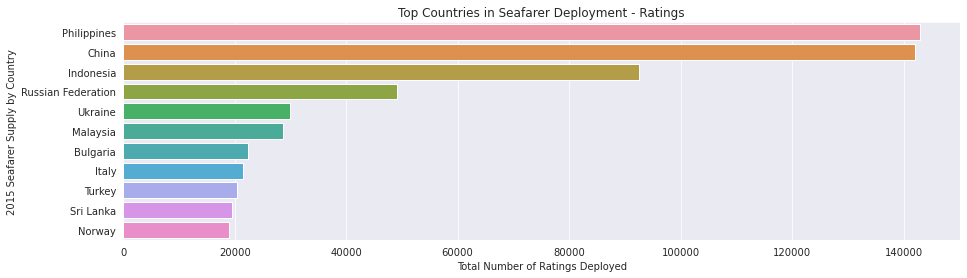

In [14]:
rating_man_plot = rating_man_df.iloc[0:11]

plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
sns.barplot(x=rating_man_plot['Ratings'], y=rating_man_plot['2015 Seafarer Supply by Country'], orient='h')
plt.xlabel('Total Number of Ratings Deployed')
plt.title('Top Countries in Seafarer Deployment - Ratings')
plt.savefig('rating_chart.png')

### Ship Scrapping
* Ship scrapping, also known as ship breaking, and/or ship demolition, is a controversial industry in the maritime and shipping community. This section shows the top countries involved in this activity. The data from 2014 to 2018 clearly shows that the Indian subcontinent, composed of Bangladesh, India, and Pakistan, is the leading player in the ship scrapping industry. These countries are then followed by China and Turkey. 

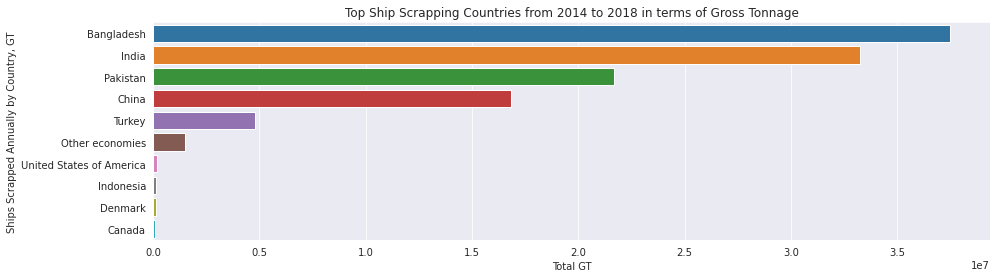

In [15]:
scrap_plot = scrap_df[['Ships Scrapped Annually by Country, GT','Total GT']].iloc[1:11]

plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
sns.barplot(x=scrap_plot['Total GT'], y=scrap_plot['Ships Scrapped Annually by Country, GT'], orient='h')
plt.title('Top Ship Scrapping Countries from 2014 to 2018 in terms of Gross Tonnage')
plt.savefig('scrap_chart.png')

## Relationships
* The section below highlights the relationships within the life cycle of merchant ships.

### Ship Building and Ship Scrapping
* Due to the highly regulated, heavily funded, and extremely cutthroat nature of the maritime industry, the cyclical relationship between ship building and ship scrapping can be identified as positively correlated. A 5 year old ship with very little technical issues can be immediately scrapped if all the other ships surrounding it are only a year old. This presents a lot of issues, economically and environmentally, and is continuously being discussed within the global maritime community.

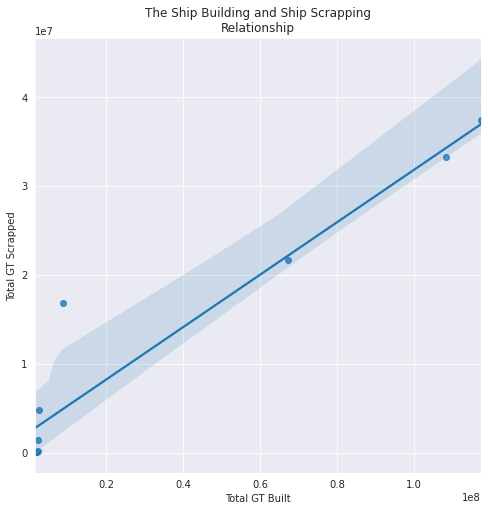

In [16]:
plt.figure(figsize=(8,8))
sns.regplot(x=build_plot['Total GT'], y=scrap_plot['Total GT'], scatter=True)

plt.title('The Ship Building and Ship Scrapping\nRelationship')
plt.xlabel('Total GT Built')
plt.ylabel('Total GT Scrapped')
plt.savefig('Ship Building and Ship Scrapping.png')

### Officers and Ratings
* With the advancement of crew welfare and ship technology, an interesting relationship is between that of ship officers and ratings. The UNCTAD data gathered from 2014 to 2018 indicates that there is a positive correlation between officers and ratings. This positive relationship can indicate that ratings are upgrading themselves to officers, and that individuals are steadily entering the seafaring workforce as new ratings.

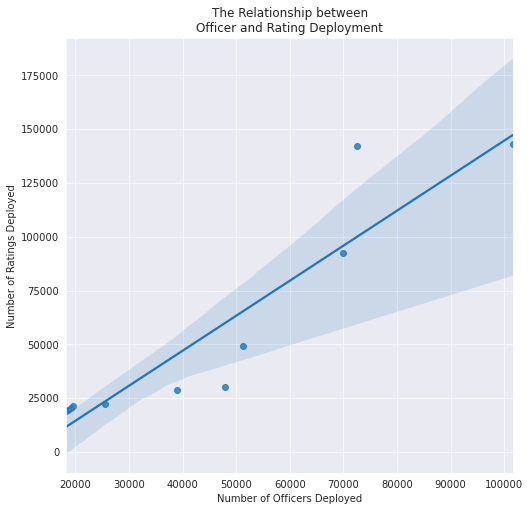

In [17]:
plt.figure(figsize=(8,8))
sns.regplot(x=officer_man_plot['Officers'], y=rating_man_plot['Ratings'], scatter=True)

plt.title('The Relationship between\nOfficer and Rating Deployment')
plt.xlabel('Number of Officers Deployed')
plt.ylabel('Number of Ratings Deployed')
plt.savefig('Officers and Ratings.png')

## Conclusion

* The life cycle of a merchant ship presents many opportunities for further research and development. This data analysis project identifies the trends present in each phase, and was able to draw insights from the UNCTAD data from 2014 to 2018. 
* In the ship building industry, the data presents that the production and activity is concentrated in the Far East, specifically in China, South Korea, and Japan. These countries all have a strong domestic maritime industry, a substantial workforce, and a considerably inviting presence towards foreign investors due to their inexpensive services and products. 
* In terms of ship registration, the dominance of bulk cargo vessels, both solid and liquid, still dominate the market. The ease and convenience of registering with developing economies is still the option many ship owners prefer. Further research and analysis on this topic is possible with more specific data. 
* In the field of ship manning and seafarer production, the Eastern countries continue to produce more seafarers than the Western countries. Further analysis on this area may focus on the general sentiment of individuals teafaring career, and the recruitment processes of national governments and shipping companies.
* In the ship scrapping industry, the Indian subcontinent dominates the market, with Bangladesh at the forefront of this controversial industry. Further research may focus on the environmental impact of this industry on a national level.  


## Author's Note:
* Thank you for reading this notebook. If you spotted any errors in my work, please do not hesitate to leave me a comment or to message me. You can reach me via email me at evbpalmejar@gmail.com, or via LinkedIn. Thank you, and I look forward to hear from you.  

In [18]:
!pip list

Package                            Version             Location
---------------------------------- ------------------- --------------
absl-py                            0.10.0
adal                               1.2.2
affine                             2.3.0
aiobotocore                        1.1.0
aiohttp                            3.6.2
aioitertools                       0.7.0
aioredis                           1.3.1
alabaster                          0.7.12
albumentations                     0.4.6
alembic                            1.4.2
allennlp                           1.0.0
altair                             4.1.0
anaconda-client                    1.7.2
anaconda-project                   0.8.3
annoy                              1.16.3
ansiwrap                           0.8.4
appdirs                            1.4.3
argh                               0.26.2
arrow                              0.15.5
arviz                              0.9.0
asn1crypto                         1.3.0
